### https://leembedded.tistory.com/22

In [1]:
import cv2
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

image = cv2.imread('./oil_test_01.jpg')
orig = image.copy()

# STEP 1 : Edge Detection

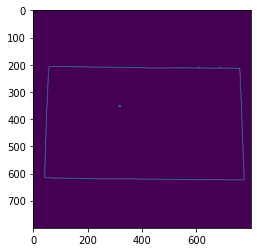

In [2]:
r = 800.0 / image.shape[0]
dim = (int(image.shape[1] * r), 800)
image = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blur = cv2.GaussianBlur(gray, (9,9), 0)
edged = cv2.Canny(blur, 70, 150)

plt.imshow(edged)

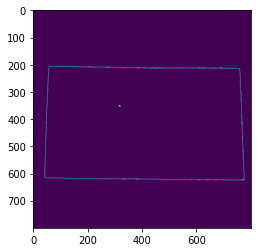

In [4]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (7,7))
closed = cv2.morphologyEx(edged, cv2.MORPH_CLOSE, kernel)
plt.imshow( closed)

In [5]:
contours, _ = cv2.findContours(closed.copy(),cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
total = 0

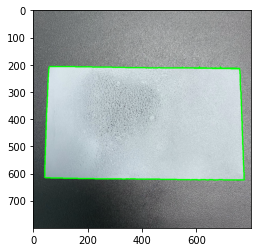

In [6]:
contours_image = cv2.drawContours(image, contours, -1, (0,255,0), 3)
plt.imshow(contours_image)

In [8]:
contours_xy = np.array(contours)
contours_xy.shape

(1, 202, 1, 2)

In [9]:
# x의 min과 max 찾기
x_min, x_max = 0,0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][0]) #네번째 괄호가 0일때 x의 값
        x_min = min(value)
        x_max = max(value)
print(x_min)
print(x_max)
 
# y의 min과 max 찾기
y_min, y_max = 0,0
value = list()
for i in range(len(contours_xy)):
    for j in range(len(contours_xy[i])):
        value.append(contours_xy[i][j][0][1]) #네번째 괄호가 0일때 x의 값
        y_min = min(value)
        y_max = max(value)
print(y_min)
print(y_max)


42
775
207
623


In [10]:
# image trim 하기
x = x_min
y = y_min
w = x_max-x_min
h = y_max-y_min

# Crop

In [11]:
img_trim = image[y:y+h, x:x+w]
cv2.imwrite('org_trim.jpg', img_trim)
org_image = cv2.imread('org_trim.jpg')

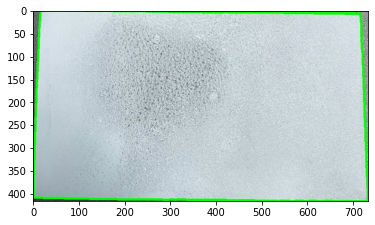

In [12]:
plt.imshow(org_image)

In [15]:
org_gray = cv2.cvtColor(org_image, cv2.COLOR_RGB2GRAY)

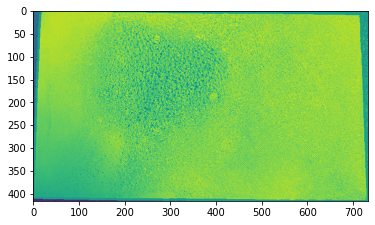

In [16]:
plt.imshow(org_gray)

(array([0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00,
        1.000e+00, 2.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 3.000e+00,
        2.000e+00, 5.000e+00, 5.000e+00, 8.000e+00, 7.000e+00, 7.000e+00,
        1.400e+01, 1.600e+01, 1.700e+01, 1.700e+01, 2.400e+01, 1.400e+01,
        2.800e+01, 2.800e+01, 3.400e+01, 2.500e+01, 3.200e+01, 2.600e+01,
        2.500e+01, 2.600e+01, 3.900e+01, 3.000e+01, 2.800e+01, 2.300e+01,
        2.900e+01, 1.500e+01, 2.700e+01, 3.500e+01, 2.100e+01, 2.700e+01,
        3.400e+01, 3.100e+01, 2.700e+01, 2.200e+01, 2.800e+01, 2.800e+01,
        2.200e+01, 2.500e+01, 3.100e+01, 4.400e+01, 2.500e+01, 3.300e+01,
        3.400e+01, 4.400e+01, 2.900e+0

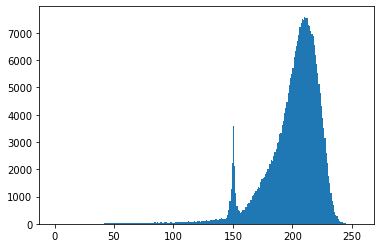

In [17]:
hist, bins = np.histogram(org_gray.ravel(), 256,[0,256])
plt.hist(org_gray.ravel(),256,[0,256])

In [13]:
hist, bins = np.histogram(org_image.ravel(), 256,[0,256])

(array([ 5113.,  1408.,  1174.,   821.,   492.,   298.,   193.,   115.,
           91.,    82.,    75.,    66.,    89.,    92.,   148.,   231.,
          339.,   480.,   524.,   563.,   535.,   445.,   303.,   201.,
          116.,    74.,    62.,    61.,    63.,    69.,    79.,   113.,
          138.,   224.,   271.,   330.,   396.,   430.,   469.,   442.,
          360.,   243.,   174.,   135.,   114.,    98.,   115.,   100.,
          116.,   154.,   193.,   242.,   283.,   347.,   382.,   382.,
          385.,   421.,   397.,   409.,   292.,   188.,   137.,   127.,
           92.,    86.,    96.,    90.,    75.,    92.,    81.,    83.,
          103.,    91.,    85.,   101.,    93.,   107.,   108.,   135.,
          111.,   110.,   100.,   139.,   130.,   131.,   143.,   125.,
          154.,   137.,   144.,   162.,   158.,   155.,   136.,   143.,
          189.,   190.,   170.,   151.,   198.,   174.,   195.,   199.,
          208.,   199.,   203.,   233.,   199.,   228.,   216., 

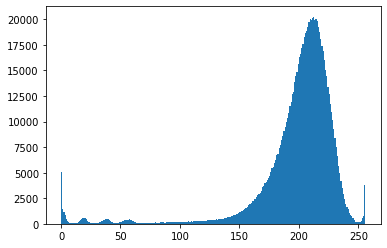

In [14]:
plt.hist(org_image.ravel(),256,[0,256])